# Tracking ML Experiment using MLFlow

- MLflow provides a comprehensive solution for managing the machine learning workflow, including experimentation and deployment
- MLflow allows for tracking and organizing experiments in a centralized place, reducing the need for suboptimal solutions such as Excel
- With MLflow, it is possible to log and reproduce past runs and results, allowing for iterative improvements
- MLflow helps to manage and store important information for each experiment, such as hyperparameters, models, accuracy, charts, and AUC curves
- By using MLflow for tracking experiments, it is possible to ensure legal compliance, such as GDPR, when dealing with sensitive data


In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df=pd.read_csv("/workspaces/Experiment_Tracking_MLFlow/data/data.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


## Binary Encoding of Categorical Variables

In [4]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

## Checking for Missing Values

In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Segregating the target variable from the features

In [7]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

## Splitting the data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

## Model Training

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

## Cross Validation

In [10]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [11]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

### We successfully developed a model, but now that we have a new set of data, what are the steps we should take to continue working with it

- One approach to working with a new set of data is to change the data and rerun the code, but this results in the loss of output and results from the old data
- Another approach is to create new cells in the same file to create a new model with the new data, but this can make it difficult to find a specific experiment when many are conducted
- A third approach is to create new files for each experiment, which can help to keep experiments organized, but still requires manual comparison of results and outputs in each file.

The current methods for tracking work and experiments are not ideal and we need to establish a more effective solution. We require something that is easy to manage, displays results and metrics clearly, and logs changes and hyperparameters in a concise manner.

# MLFlow open source platform for Machine learning life cycle.
 - Manage life cycle project
  - Track & store data
  - Store data, parameters, metrics, Artifacts

- All displayed in a web UI

- MLFLow is API based tool - logging metrics, code version, integrated with UI
- Each MLFlow Tracking session would store eveything for one single model Run
- 1 Run serves as execution of code we have written
- All runs which we run - will be stored in dir where code session is executed
- If we are working in a team it can be stored in S3 bucket / Host / on cloud
 

In [12]:
import mlflow
import os

- The problem when we are solving with random forest model will be 1 single experiment . We will have multiple runs. 
- Experiment: {Run, Run... Run}
- Experiment basically let us help us search for and visualise the run as well and download the run atrifact and meta data for analysis.

## Set Experiment
1. Set the name of the experient when we will perform task
2. All the details will be stored in YAML file


In [13]:
mlflow.set_experiment("loan_status_mlflow_exp_1")

<Experiment: artifact_location='file:///workspaces/Experiment_Tracking_MLFlow/mlruns/783665537097489086', creation_time=1675848528656, experiment_id='783665537097489086', last_update_time=1675848528656, lifecycle_stage='active', name='loan_status_mlflow_exp_1', tags={}>

## There are 3 buckets we use to keep track of Experiments
- Parameters -> mlflow.log_params()
- Metrics -> mlflow.log_metric()
- Artifacts -> mlflow.log_artifact() 

#### Artifacts are any other files we wish to store. It can be Matrix, Plots, pickle model files

In [14]:
with mlflow.start_run():
    model_rf= RandomForestClassifier(max_depth=4,random_state=5)
    model_rf.fit(X_train,y_train)

    ##capturing validation accuracy
    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)

    ##capturing trained accuracy
    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_train,pred_train)

    ##so far no metrics / parms are being tracked

    ## Step 1 give unique tag to Run
    mlflow.set_tag("mlflow.runName",'First_Run')
    
    ## Step 2 Lets log parameters
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train',train_acc)

    #Step 3 Log model
    mlflow.sklearn.log_model(model_rf,"model")

    

# We have created the experiment but where is the Dasboard 
- In the project folder terminal simply type "mlflow ui"
- A url of type http://127.0.0.1:5000 will come up
- Go to the expriment name you were working on 
- Further if you click on Model you will find date , tags, duration , status, and artifacts
- model artifacts get captured on own
- Each Model Run will create a directory - in which artifacts metrics parameters and tags are saved
- This directory is the source for the web interface


In [22]:
from IPython.display import Image
Image(url='https://github.com/anandpuntambekar/Experiment_Tracking_MLFlow/blob/main/images/img1.png?raw=true')

In [23]:
Image(url='https://github.com/anandpuntambekar/Experiment_Tracking_MLFlow/blob/main/images/img2.png?raw=true')

## Working with new data

In [15]:
train_df = pd.read_csv('/workspaces/Experiment_Tracking_MLFlow/data/data_new.csv') 
train_df.head()

train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)
    
    pred_val = model_rf.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)
    
    pred_train = model_rf.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)
    
    mlflow.set_tag('mlflow.runName','new_data')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')
    
    mlflow.sklearn.log_model(model_rf, "model")

In [25]:
Image(url='https://github.com/anandpuntambekar/Experiment_Tracking_MLFlow/blob/main/images/img3.png?raw=true')

In [26]:
Image(url='https://github.com/anandpuntambekar/Experiment_Tracking_MLFlow/blob/main/images/img3.png?raw=true')

## Hyper Parameter Tuning with MLFlow


In Random Forest we can tune parameters such as 

In [19]:

def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(X_train, y_train)

        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        run="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName',run)
        mlflow.log_param('n_estimators',n_est)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")

In [20]:
mlflow_runs(10,2,1)
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)

In [27]:
Image(url='https://github.com/anandpuntambekar/Experiment_Tracking_MLFlow/blob/main/images/img5.png?raw=true')

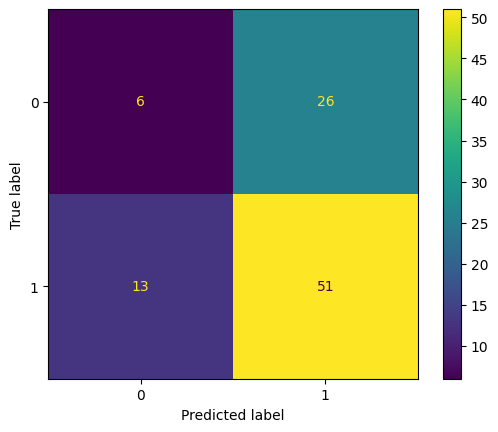

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    pred_val = knn_model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    run="KNN"
    mlflow.set_tag('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')
    
    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, "model")

In [28]:
Image(url='https://github.com/anandpuntambekar/Experiment_Tracking_MLFlow/blob/main/images/img9.png?raw=true')

In [31]:
 Image(url='https://github.com/anandpuntambekar/Experiment_Tracking_MLFlow/blob/main/images/img11.png?raw=true')